<div align="center">
    <h1>k-Nearest Neighbors: Hyperparameter Tuning for Enhanced Performance</h1>
    <hr>
    <p>In this notebook, we will dive into the practical application of the k-Nearest Neighbors (k-NN) classification algorithm using the CIFAR-10 dataset, which is a widely recognized dataset in machine learning. The goal is to explore the process of hyperparameter tuning. By utilizing cross-validation techniques, we will learn how to optimize the performance of the k-NN model, improving its accuracy and reliability on unseen data.
    </p>
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CIFAR-10 Dataset

The CIFAR-10 dataset is a collection of small images widely used for classification tasks. It consists of 60,000 32x32 color images, spread across 10 different classes, with each class containing 6,000 images. The dataset is divided into 50,000 training images and 10,000 test images. The 10 classes and their corresponding labels are:

<br>

<div align="center">

| Label |  Description | Label |  Description |
|:-----:|:------------:|:-----:|:------------:|
|   0   |     plane    |   5   |     dog      |
|   1   |      car     |   6   |     frog     |
|   2   |     bird     |   7   |    horse     |
|   3   |      cat     |   8   |     ship     |
|   4   |     deer     |   9   |    truck     |

</div>

<br>

### Loading and Subsampling the CIFAR-10 Dataset

In the following cell, we will load the CIFAR-10 dataset into memory. To make it more manageable for the k-nearest neighbors (k-NN) algorithm, we will also reduce the dataset size by subsampling. Note that the original dataset does not include a validation set, so we will create one ourselves. This validation set will be crucial for tuning the classifier's hyperparameters.

### Data Reshaping

To prepare the image data for use with the k-nearest neighbors classifier, we need to reshape the images into an appropriate format, where each image is represented as a row. To do this, we have implemented the `reshape_to_vectors` function.

### Data Normalization

It is essential to normalize the data before training the model. Normalization ensures that each feature contributes approximately proportionately to the distance computations. We have implemented the `normalize` function to normalize the data.

CIFAR-10 dataset already exists


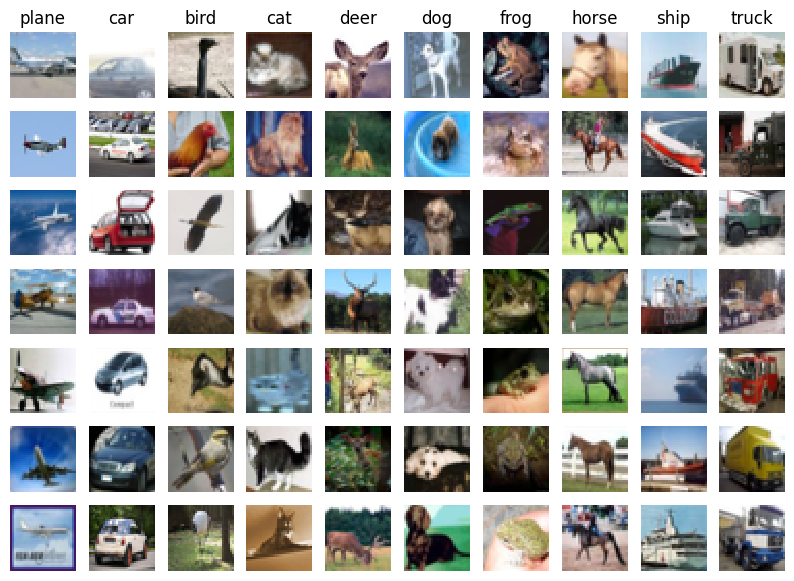

---------------- Training data ----------------
X_train shape: (8000, 32, 32, 3), y_train shape: (8000,)

---------------- Validation data ----------------
X_val shape: (1000, 32, 32, 3), y_val shape: (1000,)

---------------- Testing data ----------------
X_test shape: (1000, 32, 32, 3), y_test shape: (1000,)

---------------- Dataset info ----------------
Number of classes: 10
Number of features: 3072
Number of samples in dataset: 10000
Number of samples in training set: 8000, which is 80.00% of the dataset
Number of samples in validation set: 1000, which is 10.00% of the dataset
Number of samples in testing set: 1000, which is 10.00% of the dataset


In [7]:
import os

from utils import load_cifar10_subset, reshape_to_vectors, normalize, dataset_stats

notebook_dir = os.getcwd()
dataset_path = os.path.join(notebook_dir, 'data', 'datasets', 'CIFAR10')

X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10_subset(directory=dataset_path,
                                                                     num_train=800, 
                                                                     num_val=100, 
                                                                     num_test=100,
                                                                     visualize_samples=True)

# Print out the dataset statistics and visualize a few samples
num_features, num_classes, num_samples = dataset_stats(X_train, y_train, X_val, y_val, X_test, y_test, verbose=True)

# Reshape the data to vectors and normalize them
X_train, X_val, X_test = reshape_to_vectors(X_train, X_val, X_test)
X_train, X_val, X_test = normalize(X_train, X_val, X_test)

## Training the k-Nearest Neighbors Classifier

With our data loaded and preprocessed, we are now ready to train the k-nearest neighbors classifier that we previously constructed, using the CIFAR-10 dataset. The code for this task remains consistent with what we employed in the previous notebook. To initiate the training process, please execute the following cell.

In [8]:
from sklearn.metrics import accuracy_score
from assignments import KNNClassifier

# Create and train the classifier
knn = KNNClassifier(k=5, vectorized=True)
knn.train(X_train, y_train)

# Predict the labels of the given samples
y_pred = knn.predict(X_test)

# Compute the accuracy of the predictions, you should expect to see an accuracy of around 0.28.
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.29


## Hyperparameter Tuning
You might be wondering how we chose `k=5`. The truth is, it was just an educated guess. In this section, we will use cross-validation to determine the optimal value for this hyperparameter.

To get a better understanding of cross-validation, you can consult the ChatGPT conversation by following this link: [ChatGPT Conversation on Cross-Validation](https://chat.openai.com/share/6b1b7a91-ce99-4d3d-9743-22557c37a80e). Feel free to continue the conversation if you need more details.

Once you're comfortable with the concept of cross-validation, implement the `cross_validate_knn` function in the `assignments/tuning.py` file. Then, return to this notebook to run the following cell and find the best value for `k`.


In [4]:
from assignments import cross_validate_knn

num_folds = 5
k_choices = np.array([1, 3, 5, 8, 10, 12, 15, 20, 30], dtype=np.int32)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Find the best value of k using cross validation
k_to_metrics = cross_validate_knn(classifier=knn, X=X_train, y=y_train, k_choices=k_choices, num_folds=num_folds)

## What is the best value of k?

Now that we've completed the cross-validation, you might be expecting to determine the single best value for k, right? Well, not quite. The key takeaway from this assignment's second lesson is that there is typically no one-size-fits-all hyperparameter value. In a broader sense, as you delve into deep learning, you'll discover that there isn't a universally superior model, loss function, optimizer, or any other component. The approach that works best often depends on the specific task at hand. Remember this concept—it's crucial for project success. Be prepared to explore different models, functions, and hyperparameters, and **choose the ones that are most effective for your particular task**.

But how do we evaluate a model's performance for our task? The answer lies in metrics. From the KUI course, you should have some familiarity with metrics such as **accuracy**, **precision**, **recall**, and perhaps the **F1** score. If these concepts aren't fresh in your memory, consider looking them up for a quick refresher.

Now, let's proceed to identify the optimal value for k based on these metrics. Execute the cell below to visualize the results of our cross-validation.

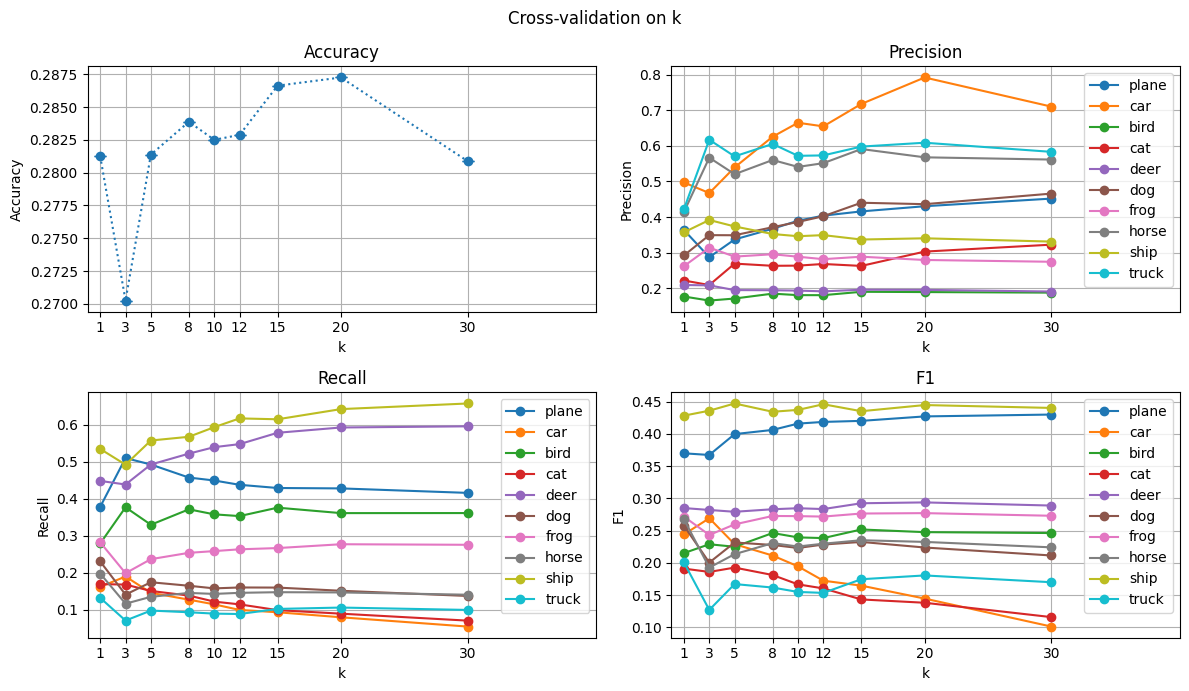

In [5]:
from utils import plot_knn_cross_validation

# Plot the cross validation results
plot_knn_cross_validation(k_to_metrics, classes)

## Classification Task

As a data scientist, you’ve been hired by Company X (not to be confused with Elon Musk’s X 😄) to develop a classifier for object recognition in images. After a meeting with the company, you've gained clarity on their expectations regarding the classifier's performance.

#### Conversation

- *You:*  "Which metrics would you like to use to evaluate the classifier?"

- *Company:*  "Metrics? What do you mean by that?"

- *You:*  "Metrics are numerical indicators that help us measure how well the classifier is working. For example, accuracy tells us how many images the classifier correctly identifies."

- *Company:*  "Got it. We want the classifier to be as accurate as possible."

- *You:*  "Understood. I'll aim for the highest possible accuracy. Is there anything else you’d like me to consider?"

- *Company:*  "Yes, we’re particularly interested in the ship class. If there’s a `ship` in the image, we want the classifier to always detect it."

- *You:*  "I see. And what if the classifier mistakenly says there’s a ship when there isn’t one?"

- *Company:*  "That’s not a big issue for us. Our main priority is to ensure the classifier doesn’t miss any ships."


<div align="center">
      <hr>
</div>

### QUESTIONS:
1. Which metric is most suitable for assessing the classifier's performance, and what is the rationale behind this choice?
2. In the context of finding the optimal k value (if the metric isn't accuracy), which class should be considered, and why?
3. What value of k is deemed the most suitable for this specific task?

### ANSWERS:
1. The most suitable metric for assessing the classifier's performance in this context is **accuracy** & **recall**. The company wants the classifier accuracy to be as high as possible. Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. In this case, the company is particularly interested in the `ship` class and wants to ensure that the classifier doesn't miss any ships. Therefore, recall is the most appropriate metric as it focuses on minimizing false negatives, i.e. minimizing "ships missed" by the classifier.\
The company also says, in the last line of the conversation, that high ***precision is not a priority*** for them, because false positives (decision=ship, reality=not-a-ship) are not a big issue. They clearly want a classifier biased towards more false positives rather than false negatives.
2. The `ship` class, because the company wants to always detect a ship if there is one.
3. From the **Accuracy** & **Recall** graphs above, the best value for this specific classifier would be k = 15 or 20 because **recall** higher with a rising k value. However beginnig with k over 20 the accuracy dramatically drops off, so values 15 and 20 are the ones that strike the best balance between *accuracy* and *ship recognition* which are the two most important features of this classifier for company X.

<div align="center">
      <hr>
</div>